<a href="https://colab.research.google.com/github/jeanlucjackson/w266_final_project/blob/main/code/evaluation/analyze_evaluations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Google Drive

In [1]:
from os import listdir
from os.path import isfile, join

import csv
import json
from pprint import pprint

import pandas as pd
from tqdm import tqdm

In [2]:
# This cell will authenticate you and mount your Drive in the Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
inference_root = "/content/drive/MyDrive/w266 NLP Final Project/Predictions/"
evaluation_root = "/content/drive/MyDrive/w266 NLP Final Project/Evaluation/"

# Load Results

## From `evaluation_dict`

In [7]:
# Standard filename for `evaluation_dict` saved in Google Drive
filename = join(evaluation_root, "evaluation_dict.json")

# Read JSON into dictionary
with open(filename) as json_file:
    evaluation_dict = json.load(json_file)

In [8]:
# Separate LISTS of results from CALCULATED AVERAGES results
series_dict = {}
value_dict = {}

# Loop through datasets
for dataset, metrics in evaluation_dict.items():
  
  # Loop through metrics and separate "_series" items
  for metric, value in metrics.items():
    
    # If it's a "series" item, add to `series_dict`
    if metric.split('_')[-1].strip() == 'series':

      # If this dataset does not yet exist in `series_dict`, add it:
      if not series_dict.get(dataset):
        series_dict.update(
            {dataset: {metric: value}}
        )
      # If this dataset already exists in `series_dict`, add metric to it:
      else:
        series_dict[dataset].update(
            {metric: value}
        )

    # If not a "series" item then it's a calculated value
    else:

      # If this dataset does not yet exist in `value_dict`, add it:
      if not value_dict.get(dataset):
        value_dict.update(
            {dataset: {metric: value}}
        )
      # If this dataset already exists in `value_dict`, add metric to it:
      else:
        value_dict[dataset].update(
            {metric: value}
        )


In [ ]:
# for k, v in series_dict.items():
#   print(k)
#   print('    ', end='')
#   for k, v in v.items():
#     print(f"{k}: ({len(v)})", end=' ')
#   print()

In [ ]:
# for k, v in value_dict.items():
#   print(k)
#   print('    ', end='')
#   for k, v in v.items():
#     print(f"{k}: {v}", end=' ')
#   print()

In [9]:
# Load value_dict into DataFrame
value_df = pd.DataFrame.from_dict(value_dict, orient='index')
print(f"{value_df.shape[0]} datasets and {value_df.shape[1]} metrics")

value_df = value_df.reset_index()\
                       .rename(columns={'index': 'filename'})

# Parse filename into metadata columns
value_df['base_model'] = value_df.apply(lambda row: row['filename'].split('.')[1], axis=1)
value_df['trained_on'] = value_df.apply(lambda row: row['filename'].split('.')[2], axis=1)
value_df['tested_on'] = value_df.apply(lambda row: row['filename'].split('.')[3], axis=1)
value_df['nickname'] = value_df.apply(lambda row: f"{row['base_model'].split('_')[0]}_{row['trained_on']}_{row['tested_on']}", axis=1)

40 datasets and 9 metrics


In [ ]:
value_df.columns

Index(['filename', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bleurt',
       'base_model', 'trained_on', 'tested_on', 'nickname'],
      dtype='object')

In [ ]:
value_df.head()

,filename,rouge1,rouge2,rougeL,rougeLsum,bleurt,base_model,trained_on,tested_on,nickname
0,predictions.T5_base_pt_long.nq.nq.csv,"[0.5882352941176471, 0.75, 0.75, 0.33333333333...","[0.13333333333333333, 0.7142857142857143, 0.57...","[0.5882352941176471, 0.75, 0.75, 0.33333333333...","[0.5882352941176471, 0.75, 0.75, 0.33333333333...","[0.1726507842540741, 0.33446216583251953, -0.8...",T5_base_pt_long,nq,nq,T5_nq_nq
1,predictions.T5_base_pt_long.nq.squad.csv,"[0.5714285714285713, 0.3333333333333333, 0.470...","[0.4210526315789474, 0.0, 0.26666666666666666,...","[0.5714285714285713, 0.3333333333333333, 0.470...","[0.5714285714285713, 0.3333333333333333, 0.470...","[-0.6205416321754456, -1.0067747831344604, -0....",T5_base_pt_long,nq,squad,T5_nq_squad
2,predictions.T5_base_pt_long.triviaqa.squad.csv,"[0.2105263157894737, 0.2, 0.5, 0.16, 0.4242424...","[0.11764705882352941, 0.0, 0.4444444444444444,...","[0.2105263157894737, 0.2, 0.5, 0.08, 0.1818181...","[0.2105263157894737, 0.2, 0.5, 0.08, 0.1818181...","[-0.8604714274406433, -0.7132484912872314, -0....",T5_base_pt_long,triviaqa,squad,T5_triviaqa_squad
3,predictions.T5_base_pt_long.nq.quac.csv,"[0.2105263157894737, 0.0, 0.0, 0.0, 0.28571428...","[0.11764705882352941, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.2105263157894737, 0.0, 0.0, 0.0, 0.28571428...","[0.2105263157894737, 0.0, 0.0, 0.0, 0.28571428...","[-1.6309146881103516, -1.715489149093628, -1.5...",T5_base_pt_long,nq,quac,T5_nq_quac
4,predictions.T5_base_pt_long.nq.triviaqa.csv,"[0.34782608695652173, 0.22222222222222224, 0.3...","[0.09523809523809525, 0.0, 0.0, 0.0, 0.0, 0.28...","[0.17391304347826086, 0.11111111111111112, 0.2...","[0.17391304347826086, 0.11111111111111112, 0.2...","[-0.7651593089103699, -1.170732021331787, -1.5...",T5_base_pt_long,nq,triviaqa,T5_nq_triviaqa


In [ ]:
value_df.groupby('trained_on').size()

trained_on
amalgam     8
nq          8
quac        8
squad       8
triviaqa    8
dtype: int64

In [ ]:
value_df.groupby('tested_on').size()

tested_on
nq          10
quac        10
squad       10
triviaqa    10
dtype: int64

## From `evaluation_database`

In [8]:
filename = join(evaluation_root, "evaluation_database.json")

# Read JSON into dataframe
evaluation_db_df = pd.read_json(filename)

In [9]:
evaluation_db_df.groupby('nickname').size()

nickname
T5_amalgam_nq              2356
T5_amalgam_quac            5868
T5_amalgam_squad          10570
T5_amalgam_triviaqa        9835
T5_nq_nq                   2356
T5_nq_quac                 5868
T5_nq_squad               10570
T5_nq_triviaqa             9835
T5_quac_nq                 2356
T5_quac_quac               5868
T5_quac_squad             10570
T5_quac_triviaqa           9835
T5_squad_nq                2356
T5_squad_quac              5868
T5_squad_squad            10570
T5_squad_triviaqa          9835
T5_triviaqa_nq             2356
T5_triviaqa_quac           5868
T5_triviaqa_squad         10570
T5_triviaqa_triviaqa       9835
bart_amalgam_nq            2356
bart_amalgam_quac          5868
bart_amalgam_squad        10570
bart_amalgam_triviaqa      9835
bart_nq_nq                 2356
bart_nq_quac               5868
bart_nq_squad             10570
bart_nq_triviaqa           9835
bart_quac_nq               2356
bart_quac_quac             5868
bart_quac_squad           10570

In [10]:
evaluation_db_df

,model_checkpoint,target,prediction,rouge1,rouge2,rougeL,rougeLsum,bleurt,bertscore-precision,bertscore-recall,bertscore-f1,meteor,base_model,framework,trained_on,tested_on,nickname
0,predictions.T5_base_pt_long.nq.nq.csv,what was the real name of saudi arabia,what is the name of the new saudi kingdom,0.588235,0.133333,0.588235,0.588235,0.172651,0.907339,0.912351,0.909838,0.459259,T5_base_pt_long,pt,nq,nq,T5_nq_nq
1,predictions.T5_base_pt_long.nq.nq.csv,whats the most liked picture on instagram 2018,what is the most liked picture on instagram,0.750000,0.714286,0.750000,0.750000,0.334462,0.947524,0.917478,0.932259,0.864796,T5_base_pt_long,pt,nq,nq,T5_nq_nq
2,predictions.T5_base_pt_long.nq.nq.csv,where does the movie proof of life take place,where does the movie adol take place,0.750000,0.571429,0.750000,0.750000,-0.815040,0.918053,0.903542,0.910740,0.669192,T5_base_pt_long,pt,nq,nq,T5_nq_nq
3,predictions.T5_base_pt_long.nq.nq.csv,where is net profit on the balance sheet,where does net profit come from in a financial...,0.333333,0.125000,0.333333,0.333333,0.047884,0.846695,0.865777,0.856129,0.311653,T5_base_pt_long,pt,nq,nq,T5_nq_nq
4,predictions.T5_base_pt_long.nq.nq.csv,when was fingerprinting first used by the police,when did fingerprint analysis become a common ...,0.125000,0.000000,0.125000,0.125000,0.092736,0.841615,0.808970,0.824970,0.125000,T5_base_pt_long,pt,nq,nq,T5_nq_nq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286285,predictions.bart_base_pt_long.amalgam.triviaqa...,Which ex British daily newspaper was first pub...,What is the name of the railway station in Man...,0.133333,0.000000,0.088889,0.088889,-1.632916,0.737380,0.651539,0.691807,0.072254,bart_base_pt_long,pt,amalgam,triviaqa,bart_amalgam_triviaqa
286286,predictions.bart_base_pt_long.amalgam.triviaqa...,Which cartoon character lived in Bunkerton Cas...,"In the Beano comic strip, who was the Earl of ...",0.222222,0.000000,0.222222,0.222222,-1.002661,0.795007,0.838565,0.816205,0.176471,bart_base_pt_long,pt,amalgam,triviaqa,bart_amalgam_triviaqa
286287,predictions.bart_base_pt_long.amalgam.triviaqa...,In which prison was 'Amy' born in the novel 'L...,What is the name of the prison in Dickens' 'Li...,0.454545,0.100000,0.363636,0.363636,-1.007403,0.854209,0.865874,0.860002,0.501674,bart_base_pt_long,pt,amalgam,triviaqa,bart_amalgam_triviaqa
286288,predictions.bart_base_pt_long.amalgam.triviaqa...,The Sign Of Four was a detective story written...,"""Who wrote the novels """"The Sign of Four"""" and...",0.400000,0.260870,0.400000,0.400000,-1.406101,0.750298,0.827784,0.787139,0.398936,bart_base_pt_long,pt,amalgam,triviaqa,bart_amalgam_triviaqa


# Calculate Statistics

`stats_df`:  
Calculate statistics on each dataset for each metric:
- Average
- Standard deviation

Plot metrics to understand each dataset's metrics:
- Histogram of each metric



# Analyze

## Trained & Tested on Same Dataset

### SQuAD - SQuAD

Analyzing models trained and tested on SQuAD 

In [ ]:
squad_squad_df = value_df[(value_df.trained_on == 'squad') &
                          (value_df.tested_on == 'squad')]
squad_squad_df

,filename,rouge1,rouge2,rougeL,rougeLsum,bleurt,base_model,trained_on,tested_on,nickname
7,predictions.T5_base_pt_long.squad.squad.csv,"[0.631578947368421, 0.26666666666666666, 0.285...","[0.47058823529411764, 0.0, 0.0, 0.222222222222...","[0.631578947368421, 0.26666666666666666, 0.285...","[0.631578947368421, 0.26666666666666666, 0.285...","[-0.058771658688783646, -0.8465666174888611, -...",T5_base_pt_long,squad,squad,T5_squad_squad
18,predictions.bart_base_pt_long.squad.squad.csv,"[0.6666666666666665, 0.3333333333333333, 0.285...","[0.5, 0.0, 0.0, 0.22222222222222224, 0.0909090...","[0.6666666666666665, 0.3333333333333333, 0.285...","[0.6666666666666665, 0.3333333333333333, 0.285...",NaN,bart_base_pt_long,squad,squad,bart_squad_squad


### TriviaQA - TriviaQA

In [ ]:
triviaqa_triviaqa_df = value_df[(value_df.trained_on == 'triviaqa') &
                                (value_df.tested_on == 'triviaqa')]
triviaqa_triviaqa_df

,filename,rouge1,rouge2,rougeL,rougeLsum,bleurt,base_model,trained_on,tested_on,nickname
15,predictions.T5_base_pt_long.triviaqa.triviaqa.csv,"[0.12903225806451615, 0.37499999999999994, 0.2...","[0.0, 0.0, 0.052631578947368425, 0.0, 0.0, 0.2...","[0.12903225806451615, 0.37499999999999994, 0.1...","[0.12903225806451615, 0.37499999999999994, 0.1...",NaN,T5_base_pt_long,triviaqa,triviaqa,T5_triviaqa_triviaqa
31,predictions.bart_base_pt_long.triviaqa.triviaq...,"[0.4761904761904762, 0.7058823529411764, 0.294...","[0.2105263157894737, 0.26666666666666666, 0.12...","[0.380952380952381, 0.3529411764705882, 0.2941...","[0.380952380952381, 0.3529411764705882, 0.2941...",NaN,bart_base_pt_long,triviaqa,triviaqa,bart_triviaqa_triviaqa


### QUAC - QUAC

In [ ]:
quac_quac_df = value_df[(value_df.trained_on == 'quac') &
                        (value_df.tested_on == 'quac')]
quac_quac_df

,filename,rouge1,rouge2,rougeL,rougeLsum,bleurt,base_model,trained_on,tested_on,nickname
13,predictions.T5_base_pt_long.quac.quac.csv,"[0.0, 0.15384615384615385, 0.5454545454545454,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.15384615384615385, 0.36363636363636365...","[0.0, 0.15384615384615385, 0.36363636363636365...",NaN,T5_base_pt_long,quac,quac,T5_quac_quac
21,predictions.bart_base_pt_long.quac.quac.csv,"[0.13333333333333333, 0.15384615384615385, 0.6...","[0.0, 0.0, 0.4, 0.5454545454545454, 0.0, 0.5, ...","[0.13333333333333333, 0.15384615384615385, 0.6...","[0.13333333333333333, 0.15384615384615385, 0.6...",NaN,bart_base_pt_long,quac,quac,bart_quac_quac


### NQ - NQ

In [ ]:
nq_nq_df = value_df[(value_df.trained_on == 'nq') &
                    (value_df.tested_on == 'nq')]
nq_nq_df

## Trained & Tested on Different Datasets

### Tested on SQuAD

In [ ]:
on_squad_df = value_df[value_df.tested_on == 'squad']
on_squad_df

### Tested on TriviaQA

In [ ]:
on_triviaqa_df = value_df[value_df.tested_on == 'triviaqa']
on_triviaqa_df

### Tested on QuAC

In [ ]:
on_quac_df = value_df[value_df.tested_on == 'quac']
on_quac_df

### Tested on NQ

In [ ]:
on_nq_df = value_df[value_df.tested_on == 'nq']
on_nq_df

## Top Performers by Metric

In [11]:
top_X_performers = 5

metrics = [
    # 'rouge1',
    # 'rouge2',
    'rougeL',
    'meteor',
    'bleurt',
    # 'bertscore-precision',
    # 'bertscore-recall',
    'bertscore-f1'
]

In [12]:
print(f"Printing top {top_X_performers} performers...\n")

for met in metrics:
  tops = value_df.sort_values(by=met, ascending=False)[['nickname', 'trained_on', 'tested_on', met]]\
                   .head(top_X_performers)
  print(met + ':\n', tops, '\n')

Printing top 5 performers...



NameError: ignored

# Plotting

## Metric Averages

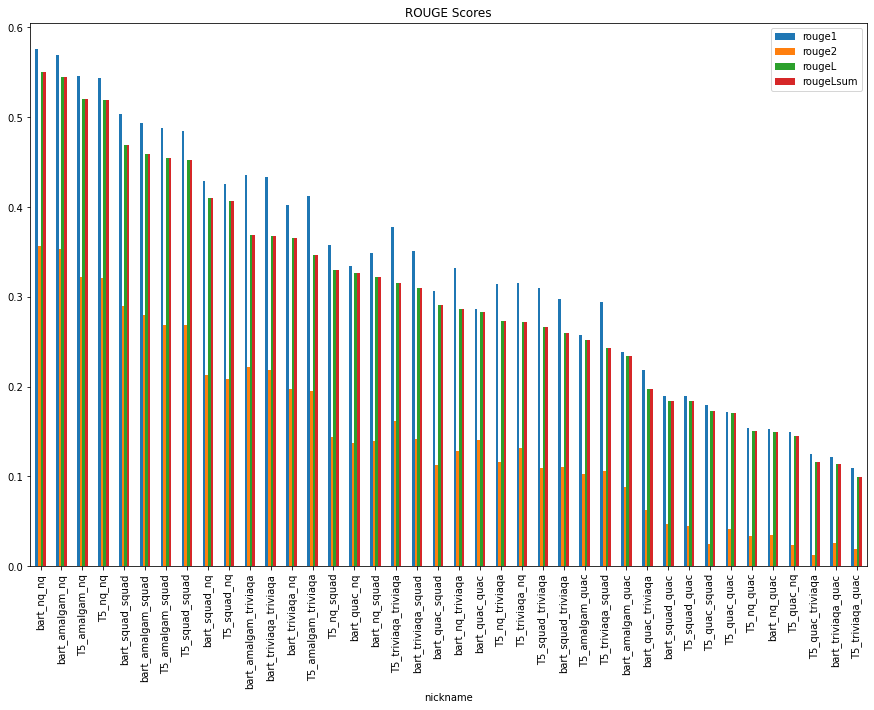

In [ ]:
rouge_fig = value_df[['nickname', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum']]\
              .set_index('nickname')\
              .sort_values(by='rougeL', ascending=False)\
              .plot.bar(figsize=(15,10),
                      title='ROUGE Scores')\
              .get_figure()
rouge_fig

plot_name = join(inference_root, "rouge.png")
rouge_fig.savefig(plot_name, bbox_inches='tight')

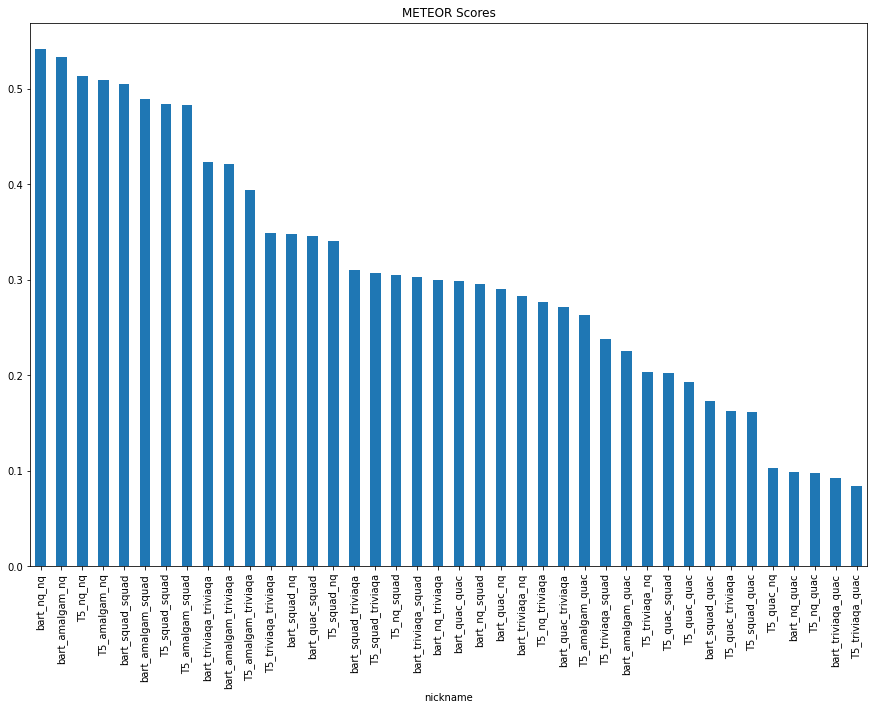

In [ ]:
meteor_fig = value_df[['nickname', 'meteor']]\
              .set_index('nickname')\
              .sort_values(by='meteor', ascending=False)\
              .plot.bar(figsize=(15,10),
                      title='METEOR Scores',
                      legend=False)\
              .get_figure()
meteor_fig

plot_name = join(inference_root, "meteor.png")
meteor_fig.savefig(plot_name, bbox_inches='tight')

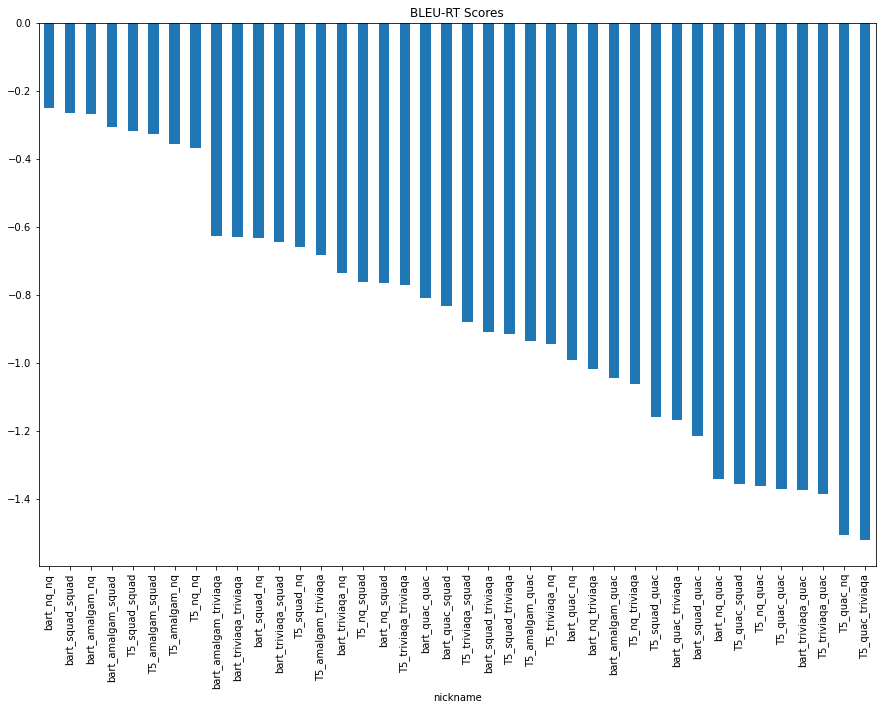

In [ ]:
bleurt_fig = value_df[['nickname', 'bleurt']]\
              .set_index('nickname')\
              .sort_values(by='bleurt', ascending=False)\
              .plot.bar(figsize=(15,10),
                        title='BLEU-RT Scores',
                        legend=False)\
              .get_figure()

bleurt_fig

plot_name = join(inference_root, "bleurt.png")
bleurt_fig.savefig(plot_name, bbox_inches='tight')

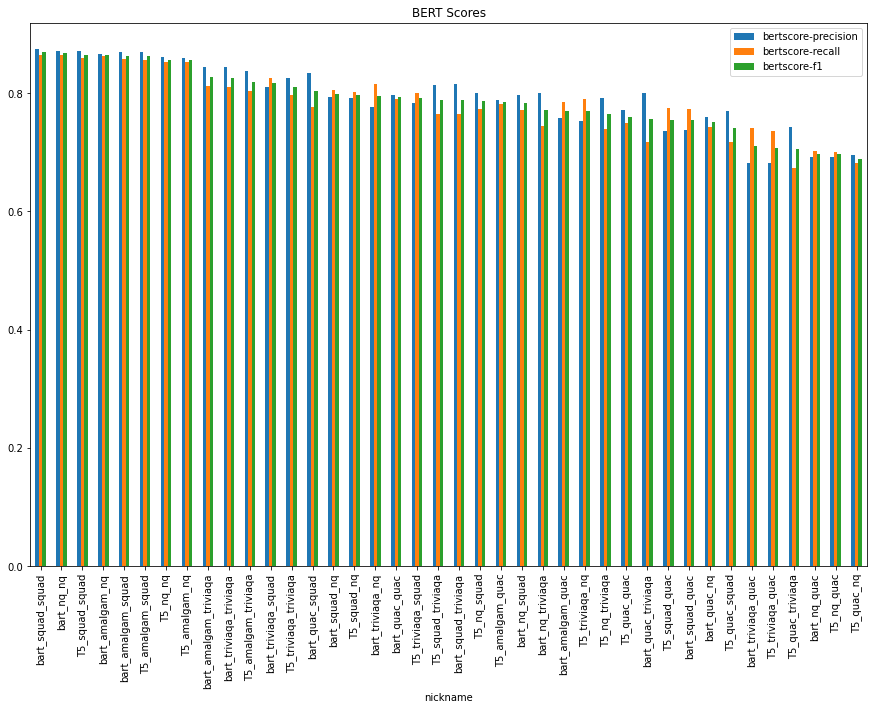

In [ ]:
bertscore_fig = value_df[['nickname', 'bertscore-precision', 'bertscore-recall', 'bertscore-f1']]\
                  .set_index('nickname')\
                  .sort_values(by='bertscore-f1', ascending=False)\
                  .plot.bar(figsize=(15,10),
                            title='BERT Scores')\
                  .get_figure()
bertscore_fig

plot_name = join(inference_root, "bertscore.png")
bertscore_fig.savefig(plot_name, bbox_inches='tight')